# Task 1 - Quantum Computing

#### 1) implement a simple quantum operation with Cirq

* With 5 qubits

* Apply Hadamard operation on every qubit

* Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)

* SWAP (0, 4)

* Rotate X with pi/2 on any qubit

* Plot the circuit

* Importing libraries

In [2]:
import cirq
import numpy as np

In [3]:
#Initializing the circuit
circuit = cirq.Circuit()
#Applying Hadamard on every qubit
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(5))
#ApplyING CNOT operation on (0, 1), (1,2), (2,3), (3,4)
circuit.append(cirq.CNOT(x,x+1) for x in cirq.LineQubit.range(4))
#Applying SWAP (0, 4) gate
circuit.append(cirq.SWAP(cirq.LineQubit(0),cirq.LineQubit(4)))
#Rotate X with pi/2 on any qubit (here qubit_0)
circuit.append(cirq.rx(np.pi/2)(cirq.LineQubit(0)))
#Plotting the circuit
print(circuit)


0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×──────────────


#### 2) Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state. 

In [15]:
circ1 = cirq.NamedQubit('a')
simulator = cirq.Simulator()
delta = np.pi / 50
circuit = cirq.Circuit([cirq.rx(delta)(circ1) for theta in range(200)])
print("Circuit with 200 number of ", delta, "roundations along x-axis")
#print(circuit)

Circuit with 200 number of  0.06283185307179587 roundations along x-axis


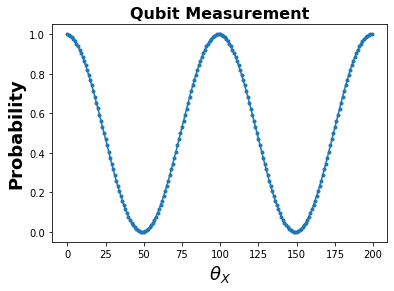

In [16]:
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
probs = []
iteration = []
plt.xlabel(r"$\theta_X$", fontsize = 18, fontweight = 'bold')
plt.ylabel(r"Probability", fontsize = 18, fontweight = 'bold')
plt.title("Qubit Measurement", fontsize = 16, fontweight = 'bold')

for i,step in enumerate(simulator.simulate_moment_steps(circuit)):
    prob = np.abs(step.state_vector()) ** 2
    iteration.append(i)
    probs.append(prob[0])
plot(iteration, probs, '.-')

or it can also be done using -

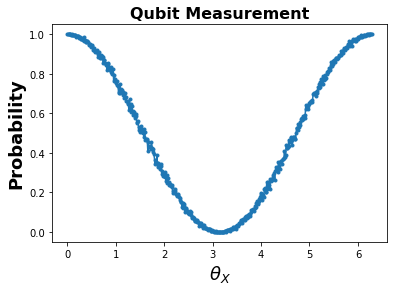

In [17]:
trials = 1000
Rx_theta = np.linspace(0,2*np.pi,500)
proba_0_state = []
for theta in Rx_theta:
  # create a circuit
  circuit = cirq.Circuit()
  # apply Rx rotation by theta to the first qubit
  circuit.append([cirq.rx(theta)(cirq.LineQubit(0))])
  # measure the qubit
  circuit.append([cirq.measure(cirq.LineQubit(0), key = 'm')])
  simulator = cirq.Simulator()
  # do the measurements for `trials` times
  result = simulator.run(circuit, repetitions=trials).measurements['m']
  # count the number of times the qubit is in the 0 and 1 states
  N_state_1 = np.count_nonzero(result)
  N_state_0 = trials - N_state_1
  proba = N_state_0/trials
  proba_0_state.append(proba)
  
import matplotlib.pyplot as plt
plt.plot(Rx_theta,proba_0_state,'.-')
plt.xlabel(r"$\theta_X$", fontsize = 18, fontweight = 'bold')
plt.ylabel(r"Probability", fontsize = 18, fontweight = 'bold')
plt.title("Qubit Measurement", fontsize = 16, fontweight = 'bold')
plt.savefig('QubitMeasurement.eps')
plt.savefig('QubitMeasurement.png')